In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import newInds

%matplotlib inline

In [2]:
sns.set_style('darkgrid')
sns.set_context('talk')

In [3]:
params = np.load('ordering.npz')
print params['params']
print params['values']

[[u'simulation' u'phase_seed']
 [u'connectivity' u'network_seed']]
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]]


In [4]:
N1, N2 = 20, 20
inds_init = [0, 200, 4000, 5000]
results = np.zeros([4, N1, N2])
for i in xrange(N1):
    for j in xrange(N2):
        
        data = np.load('result-{}-{}.npz'.format(i, j))
        scores_pre, scores_post = data['spike_scores_pre'], data['spike_scores_post']
        ablated = data['ablated']
        
        inds = newInds(inds_init, ablated)
        scores_pre, scores_post = np.delete(scores_pre, ablated), np.delete(scores_post, ablated)
        
        diff = scores_post - scores_pre
        means = np.zeros(4)
        means[:3] = [np.mean(diff[inds[k]:inds[k+1]]) for k in xrange(len(inds)-1)]
        means[3] = np.mean(diff[inds[0]:inds[2]])
        results[:, i, j] = means

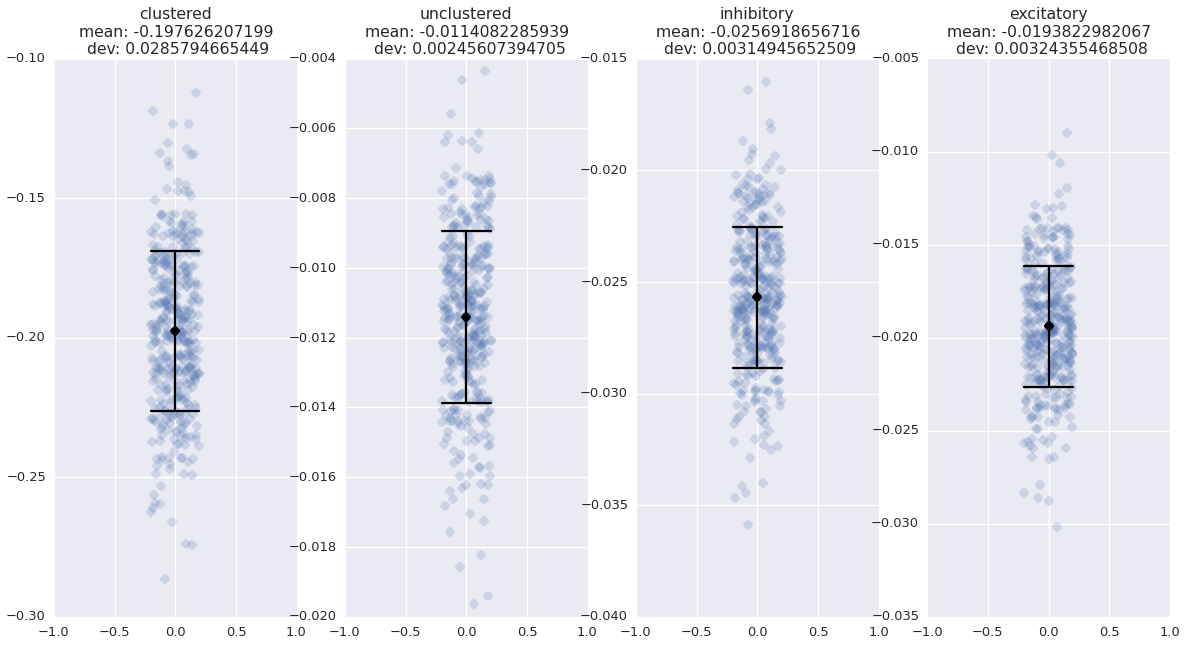

In [10]:
names = ['clustered', 'unclustered', 'inhibitory', 'excitatory']
plt.figure(figsize=(20,10))
for i in xrange(4):
    
    vals = results[i,:,:].flatten()
    mean = np.mean(vals)
    dev = np.std(vals)
    
    plt.subplot(1,4,i+1)
    w = 0.4
    plt.plot(w*(np.random.rand(len(vals))-0.5), vals, 'o', alpha=0.2)
    plt.xlim([-1,1])
    plt.plot([0], [mean], 'ok')
    plt.plot([0, 0], [mean-dev, mean+dev], 'k')
    plt.plot([-w/2, w/2], [mean+dev, mean+dev], 'k')
    plt.plot([-w/2, w/2], [mean-dev, mean-dev], 'k')
    plt.title('{}\nmean: {}\n dev: {}'.format(names[i], mean, dev))
    
plt.savefig()